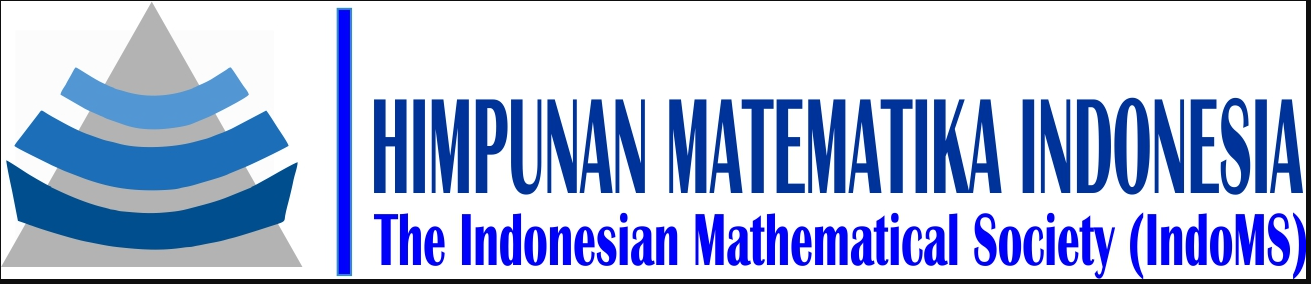

# Topological Data Analysis School 2023 by IndoMS

Kelas Praktek TDA

Pengajar : Utih Amartiwi, M.Sc

**Sebelum mulai praktek, klik "file" ==> "save a copy in drive" agar kodingannya tersimpan di gdrive masing-masing**

#Topological Machine Learning


Menurut paper “A Survey of Topological Machine Learning Methods” secara umum ada 2 tipe implementasi TDA di Machine Learning:

1. **Extrinsic** : Terpisah dari model, misalnya menjadi bagian exploratory data analysis (EDA), preprocessing, feature engineering, evaluasi model   
2. **Intrinsic** : Menjadi bagian dari model, membuat algoritma machine learning baru dengan implementasi topologi di dalamnya


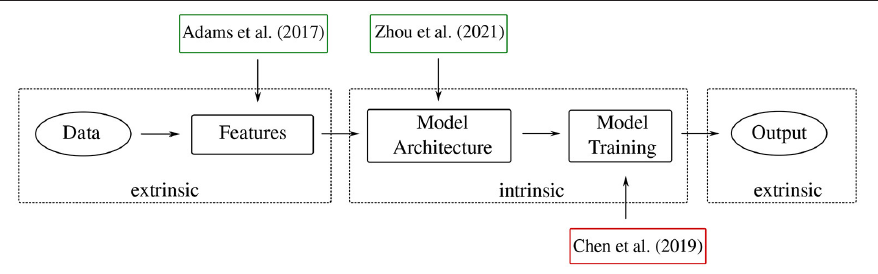

# Persiapan Dataset
Data bisa di-download [disini](https://drive.google.com/drive/folders/1ytjmil4k2WoHsi9_XRpkV2tdjybU2sNc?usp=sharing)

Upload data ke google colab sebelum praktek agar tidak begitu lama menunggu. Data yang digunakan untuk praktek :    
1. customer asuransi
2. AML
3. curah hujan

Sisanya untuk tugas kelompok

# Mempersiapkan Library

In [ ]:
#Install Library
!pip install -U giotto-tda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


In [ ]:
# Import all necessary modules
import pandas as pd
import numpy as np
from gtda.time_series import SingleTakensEmbedding
import matplotlib.pyplot as plt
from gtda.plotting import plot_point_cloud, plot_heatmap
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch, AgglomerativeClustering, MeanShift
from scipy import stats
from gtda.mapper import CubicalCover, make_mapper_pipeline, Eccentricity, Entropy, Projection, plot_static_mapper_graph,plot_interactive_mapper_graph


# Exploratory Data Analysis (EDA) with TDA

## Useful references

* [_A Topological "Reading" Lesson: Classification of MNIST using TDA_](https://arxiv.org/abs/1910.08345) by Adélie Garin and Guillaume Tauzin
* [_The MNIST Database of Handwritten Digits_](http://yann.lecun.com/exdb/mnist/) by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges

Dataset yang digunakan adalah gambar-gambar tulisan tangan digit 0-9

In [ ]:
#Import dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X[0].shape

(784,)

## Membuat Persistence Diagram (PD) dan Menghitung Persistence Entropy (PE)

In [ ]:
#fungsi untuk membuat visualisasi dataset
def visualkan(index):
  img_reshape = X[index].reshape(28, 28)      #harus 2D
  return plot_heatmap(img_reshape)

In [ ]:
#Membuat Persistence diagram dan menghitung persistence entropy
def buatpd(index, dimensi=[0, 1]):
  img_reshape = X[index].reshape(1, 28, 28)   #harus 3D
  vr = VietorisRipsPersistence(n_jobs=-1, homology_dimensions=dimensi)
  pd = vr.fit_transform(img_reshape)
  pe = PersistenceEntropy().fit_transform(pd)

  print(pe)
  return vr.plot(pd)

### Misalkan menggunakan gambar digit 0

In [ ]:
#Mencari tau index ke berapa gambar digit tertentu, misalnya 0 maka y[i]=='0'
for i in range(40):
  if y[i]=='0':
    print(i)

1
21
34
37


In [ ]:
#Mengecek gambar 2d dari data index 1
visualkan(1)

In [ ]:
#Membuat PD & PE dari data index 1
buatpd(1)

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



[[4.26832823 1.43178527]]


In [ ]:
#Membuat PD dan PE dari gambar digit '0' di index lainnya
buatpd(1)

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



[[4.26832823 1.43178527]]


In [ ]:
buatpd(37)

[[4.26505907 1.59986482]]


/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



### Bandingkan dengan digit lainnya

In [ ]:
#Misalnya 2
for i in range(40):
  if y[i]=='2':
    print(i)

5
16
25
28


In [ ]:
#Silahkan jika ingin memvisualisasikan 2D
visualkan(5)

In [ ]:
#Buat PD & PE-nya
buatpd(5)

[[4.07799052 2.07265984]]


/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



In [ ]:
buatpd(16)

[[3.89355903 2.20381182]]


/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.

/usr/local/lib/python3.10/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning:

Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.



**Terlihat bahwa gambar digit yang sama memiliki Persistence Diagram (PD) dan nilai Persistence Entropy (PE) yang berdekatan, sehingga, daripada menggunakan data gambar secara langsung, kita bisa menggunakan nilai PE-nya saja untuk mengklasifikasi data dan lebih menghemat komputasi**

# TDA for Customer Segmentation
Customer Segmentation adalah proses mengelompokkan customer berdasarkan kriteria tertentu. Biasanya pengelompokan ini menggunakan clustering yang merupakan unsupervised learning (tanpa label). Dengan TDA kita bisa mengelompokkan customer dengan semi-supervised learning.

## Case Pelanggan Asuransi
Misalkan kita memiliki data profil pelanggan asuransi dan ingin mengelompokkan mereka berdasarkan karakter dan harga yang bersedia mereka keluarkan untuk asuransi. Dengan begitu, kita dapat menawarkan produk atau promo yang tepat

In [ ]:
data_asuransi = pd.read_excel('data customer asuransi.xlsx')
data_asuransi

,ID,Marital status,Age,Education,Social Economic Class,Price
0,100000001,0,67,2,1,124670
1,100000002,1,22,1,1,150773
2,100000003,0,49,1,0,89210
3,100000004,0,45,1,1,171565
4,100000005,0,53,1,1,149031
...,...,...,...,...,...,...
1995,100001996,0,47,1,0,123525
1996,100001997,1,27,1,1,117744
1997,100001998,0,31,0,0,86400
1998,100001999,1,24,1,0,97968


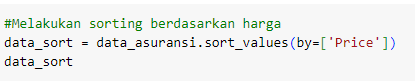

In [ ]:
#Melakukan sorting berdasarkan harga
data_sort = #Ketik kodingan disini
data_sort

,ID,Marital status,Age,Education,Social Economic Class,Price
640,100000641,1,27,1,0,35832
1368,100001369,0,34,1,0,36760
1578,100001579,1,27,1,0,38247
1795,100001796,1,28,1,0,38980
1399,100001400,1,27,1,0,40606
...,...,...,...,...,...,...
1029,100001030,0,68,2,2,287106
917,100000918,0,68,2,2,287247
915,100000916,1,32,1,2,308491
1041,100001042,1,61,2,2,308529


In [ ]:
#membuat dataframe baru dengan menghapus ID karena tidak digunakan saat pembuatan mapper
data_copy = data_sort.copy()
del data_copy['ID']
data_copy

,Marital status,Age,Education,Social Economic Class,Price
640,1,27,1,0,35832
1368,0,34,1,0,36760
1578,1,27,1,0,38247
1795,1,28,1,0,38980
1399,1,27,1,0,40606
...,...,...,...,...,...
1029,0,68,2,2,287106
917,0,68,2,2,287247
915,1,32,1,2,308491
1041,1,61,2,2,308529


## Membuat mapper dari data asuransi
Tentukan hyperparameternya:
1. Filter function untuk memproyeksi data
2. Data yang sudah diproyeksi ingin dibagi menjadi berapa cluster?
3. Berapa persen overlapnya?
4. Metode clustering

In [ ]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=['Price'])                       #kolom yang kita gunakan untuk memproyeksi data

# Define cover
cover = CubicalCover(n_intervals=5, overlap_frac=0.2)             #jumlah interval dan persenan overlap

# Choose clustering algorithm
clusterer = KMeans(n_clusters=2)                                  #metode clustering
#alternatif lain bisa menggunakan DBSCAN, dll
#clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs
)

fig = plot_static_mapper_graph(pipe, data_copy, color_data=data_copy, color_features=filter_func)
fig.show(config={'scrollZoom': True})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Coba gonta-ganti nilai interval, persentase overlaping, dan metode clusteringnya.

Hasil mapper yang bagus itu ketika kita bisa melihat pola "berurutan" dari node dengan nilai summary terendah hingga tertinggi.

## Membuat kelompok segment

Sekarang kita input hasil pengelompokan ke tabel. Karena di metode mapper menggunakan "overlap", artinya ada member asuransi yang berada di 2 kelompok segment. Disini kita asumsikan bahwa harga rendah lebih diterima sehingga jika ada 1 respondent yang berada di 2 kelompok segment, maka kita masukkan respondent tersebut ke segment yang rata2 pricenya lebih rendah

In [ ]:
#urutkan id dengan summary statistics dari besar ke kecil, boleh diikuti atau tidak
id = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
#menginput kelompok segment
graph = pipe.fit_transform(data_copy)
list_segment = [0]*2000                        #membuat list sementara yang berisi 0 sebanyak 2000 (krn ada 2000 respondent)
node_elements = graph.vs["node_elements"]
for i in id:                                   #nomor kelompok segment
  for n in node_elements[i]:                   #nomor respondent per segment
    list_segment[n] = i                        #menyimpan nomor kelompok segment sesuai urutan respondent

data_sort['segment'] = list_segment
data_sort

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

,ID,Marital status,Age,Education,Social Economic Class,Price,segment
640,100000641,1,27,1,0,35832,0
1368,100001369,0,34,1,0,36760,0
1578,100001579,1,27,1,0,38247,0
1795,100001796,1,28,1,0,38980,0
1399,100001400,1,27,1,0,40606,0
...,...,...,...,...,...,...,...
1029,100001030,0,68,2,2,287106,9
917,100000918,0,68,2,2,287247,9
915,100000916,1,32,1,2,308491,9
1041,100001042,1,61,2,2,308529,9


In [ ]:
#Mengembalikan urutan sesuai id awal
datanew = data_sort.sort_values(by=['ID'])
datanew

,ID,Marital status,Age,Education,Social Economic Class,Price,segment
0,100000001,0,67,2,1,124670,3
1,100000002,1,22,1,1,150773,3
2,100000003,0,49,1,0,89210,1
3,100000004,0,45,1,1,171565,5
4,100000005,0,53,1,1,149031,3
...,...,...,...,...,...,...,...
1995,100001996,0,47,1,0,123525,3
1996,100001997,1,27,1,1,117744,2
1997,100001998,0,31,0,0,86400,1
1998,100001999,1,24,1,0,97968,1


In [ ]:
#Menyimpan data
datanew.to_excel('data dengan segment.xlsx')

## Membuat statistik deskriptif per kelompok segment

In [ ]:
datanew.keys()

Index(['ID', 'Marital status', 'Age', 'Education', 'Social Economic Class',
       'Price', 'segment'],
      dtype='object')

In [ ]:
data_desc = pd.DataFrame()                         #Membuat Dataframe kosong
marital = []                                       #Membuat list kosong yang akan diisi dengan hitungan statistik per feature
age = []
edu = []
sec = []
price = []
segm = []
for i in id:
  segm.append(i)                                                                #menambahkan kode segment ke list segment
  marital.append(datanew[datanew['segment']==i]['Marital status'].median())     #karena datanya kategorik, kita pake median
  age.append(datanew[datanew['segment']==i]['Age'].mean())                      #karena datanya numerik, kita pake mean
  edu.append(datanew[datanew['segment']==i]['Education'].median())
  sec.append(datanew[datanew['segment']==i]['Social Economic Class'].median())
  price.append(datanew[datanew['segment']==i]['Price'].mean())

data_desc['segment']=segm                                                       #hintungan dari list diinput ke dataframe
data_desc['marital']=marital
data_desc['age']=age
data_desc['education']=edu
data_desc['sec']=sec
data_desc['price']=price

data_desc

,segment,marital,age,education,sec,price
0,9,0.5,54.583333,2.0,2.0,289313.916667
1,8,0.0,50.111111,2.0,2.0,266322.777778
2,7,0.0,38.103448,1.0,2.0,230077.206897
3,6,1.0,46.095238,2.0,2.0,211497.380952
4,5,1.0,43.530201,1.0,2.0,178848.516779
5,4,0.0,40.554455,1.0,1.0,158400.168317
6,3,0.0,38.655405,1.0,1.0,132982.966216
7,2,1.0,33.029297,1.0,1.0,109872.871094
8,1,1.0,31.935754,1.0,0.0,91545.874302
9,0,0.0,31.470046,1.0,0.0,66937.267281


Terlihat bahwa status ekonomi cenderung mempengaruhi harga yang mau dibayar oleh member. Member dengan usia 50an dg status menikah cenderung bersedia membayar lebih mahal daripada yang tidak menikah. Usia 30 - 40 yang cukup mapan dan belum menikah cenderung mau membayar lebih mahal dari yang sudah. Usia 30 - 40 yang sudah menikah tapi berpendidikan lebih tinggi cenderung mau membayar asuransi lebih mahal. Begitu seterusnya

# TDA for High Dimensional Data Analysis
Approach ini inspired by :    [Identification of key features using topological data analysis for accurate prediction of manufacturing system outputs](https://www.sciencedirect.com/science/article/abs/pii/S0278612517300286)

## Case data gen
Misalkan kita mau mengolah data genetik untuk mencari tau gen mana yang mempengaruhi kesembuhan pasien. Misalkan Y adalah berapa hari pasien menunggu hingga sembuh

Coba lakukan input dataset ke dataframe sebagai berikut :     

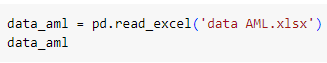

In [ ]:
#Ketik disini

,Y,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A6274,A6275,A6276,A6277,A6278,A6279,A6280,A6281,A6282,A6283
0,3,0.116,-0.008710,0.082150,-0.02870,0.558300,0.50670,1.389000,0.793800,1.26300,...,-0.4189,-0.2633,-0.3048,0.33550,-0.06634,-0.71650,-1.112000,-0.602400,-0.42720,0.156800
1,243,-1.042,0.526800,-1.315000,-1.44700,-1.329000,1.13200,0.724700,0.387800,0.24570,...,1.1460,0.7067,0.3282,-0.38260,-0.74540,0.30740,0.352200,0.536500,1.06000,-0.074280
2,711,2.213,0.409148,1.166000,0.66510,1.394000,-0.42760,-0.031536,-0.706400,-0.02246,...,-0.6291,-0.3835,-0.2870,-0.58280,-0.12560,-0.73180,-0.935000,-0.225700,-0.84750,1.042000
3,663,-1.236,0.068980,0.255200,-0.01561,0.392400,1.51500,0.258800,1.612000,1.32300,...,-0.7218,-0.7412,-0.1907,0.25750,0.20970,0.36360,0.649300,0.158470,0.88890,0.057589
4,720,1.019,-0.412793,0.623300,-1.11200,-1.848000,-1.00500,0.490127,1.048000,1.07800,...,-1.3780,-1.1590,-0.8256,-0.46840,-0.39940,-0.02435,0.061420,-0.036934,-0.69710,0.189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,206,0.271,0.019524,-0.305521,-1.36800,-1.351000,-0.05152,0.526100,0.316300,0.22580,...,-0.8948,-0.9285,-0.5086,0.06535,0.39670,1.63800,2.149000,-0.186400,0.60720,-0.559900
111,622,-0.827,0.449800,-0.090860,-1.05400,0.011340,0.07144,0.922000,-0.333204,0.15770,...,-0.0897,-0.8836,-0.5207,-0.52270,-1.14400,-1.14800,-0.556061,-1.222000,0.22410,0.187100
112,281,-1.172,-1.006720,0.448600,0.45290,-0.131750,0.31340,-1.160000,-0.825626,-0.15530,...,-4.5640,-2.7010,-0.2777,-0.37670,-0.05200,-0.22824,0.603920,-4.199000,-1.72100,0.140100
113,33,-1.418,-0.058230,-0.072010,0.83210,0.141735,0.13170,-0.634800,-0.331250,0.11900,...,1.1390,1.4790,0.9026,0.19389,-2.01300,-1.24300,0.176140,1.731000,-0.12665,0.459300


In [ ]:
#Sorting berdasarkan lama sembuhnya
aml_sort = data_aml.sort_values(by=['Y'])
aml_sort

,Y,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A6274,A6275,A6276,A6277,A6278,A6279,A6280,A6281,A6282,A6283
78,1,-0.865900,-0.727100,0.12380,-0.26110,-0.87860,-0.3025,0.02408,-0.05169,0.11580,...,0.069210,-0.2115,-0.090796,-0.251600,-0.383200,-0.978900,-0.863100,-0.292400,-0.55780,-0.577800
20,1,0.269618,0.283280,-0.66210,-0.25100,0.46800,-0.2666,0.25537,0.35967,-0.14441,...,0.254900,0.3725,-0.466000,0.154541,0.361211,-0.152560,-0.665430,0.156008,0.42515,0.656818
0,3,0.116000,-0.008710,0.08215,-0.02870,0.55830,0.5067,1.38900,0.79380,1.26300,...,-0.418900,-0.2633,-0.304800,0.335500,-0.066340,-0.716500,-1.112000,-0.602400,-0.42720,0.156800
51,7,-0.438400,0.097010,0.07302,0.17860,0.20620,-0.9097,1.00300,-0.15830,0.46330,...,-0.574800,-0.3870,0.068000,-1.354000,-0.737500,-0.242100,-0.379179,0.081185,1.06700,-0.278400
27,12,4.195000,0.197000,-0.61300,1.25600,0.04115,1.1800,1.08500,1.05100,-1.66900,...,0.005189,0.1670,-0.522000,0.673400,0.562900,-0.708100,-0.606000,-0.865000,-0.26258,2.813000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1296,-0.964800,0.002015,-0.59510,-0.37290,-0.30650,-0.1454,0.36120,0.44740,0.69390,...,-0.103700,-0.3294,-0.082490,-0.138500,0.187900,2.382000,3.040000,0.386700,-1.17200,-0.707700
14,1336,0.337400,-0.322140,-0.22640,0.06771,0.79970,-0.5189,-0.04582,-0.44380,-0.57180,...,-0.511400,-0.3758,-0.047360,-0.035130,0.388100,0.120900,0.058660,-0.101290,0.50620,-0.498800
73,1352,-1.091000,-0.821300,0.55070,-0.09221,0.27730,0.5804,-0.71610,-1.10100,-0.35840,...,-0.333900,-0.4126,-0.774800,0.269200,0.535600,-0.903100,-0.975200,-0.877600,-0.74500,0.381000
23,1388,-0.025780,0.088600,-0.78640,-0.39890,0.14980,0.4929,0.32120,-1.36000,-2.43100,...,-1.270000,-1.0590,-0.734400,-0.392000,0.197600,-0.643353,-0.610400,-0.850400,-0.95580,-0.634800


## Membuat Mapper dari data gen
Hyperparameter yang sudah dirasa sesuai:
1. filter function --> column 'Y'
2. jumlah interval 14
3. 55% overlap
4. clusternya DBSCAN

Coba masukkan ke kodingan berikut atau coba hyperparameter lainnya


In [ ]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=['...'])


# Define cover
cover = CubicalCover(n_intervals=..., overlap_frac=...)

# Choose clustering algorithm
#clusterer = KMeans(n_clusters=2)
#alternatif lain bisa menggunakan DBSCAN, dll
#clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs
)

fig = plot_static_mapper_graph(pipe, aml_sort, color_data=aml_sort, color_features=filter_func)
fig.show(config={'scrollZoom': True})

dengan hyperparameter saat ini diperoleh node yang rendah = [0]

dan node yang tinggi = [7, 8, 9, 10, 11, 12, 13]


## Ambil data beberapa node dengan Y tinggi dan rendah

In [ ]:
graph = pipe.fit_transform(aml_sort)
node_elements = graph.vs["node_elements"]

In [ ]:
data_low = aml_sort.iloc[node_elements[0]]
data_low

,Y,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A6274,A6275,A6276,A6277,A6278,A6279,A6280,A6281,A6282,A6283
78,1,-0.865900,-0.727100,0.123800,-0.261100,-0.878600,-0.302500,0.024080,-0.051690,0.115800,...,0.069210,-0.211500,-0.090796,-0.251600,-0.383200,-0.978900,-0.863100,-0.292400,-0.557800,-0.577800
20,1,0.269618,0.283280,-0.662100,-0.251000,0.468000,-0.266600,0.255370,0.359670,-0.144410,...,0.254900,0.372500,-0.466000,0.154541,0.361211,-0.152560,-0.665430,0.156008,0.425150,0.656818
0,3,0.116000,-0.008710,0.082150,-0.028700,0.558300,0.506700,1.389000,0.793800,1.263000,...,-0.418900,-0.263300,-0.304800,0.335500,-0.066340,-0.716500,-1.112000,-0.602400,-0.427200,0.156800
51,7,-0.438400,0.097010,0.073020,0.178600,0.206200,-0.909700,1.003000,-0.158300,0.463300,...,-0.574800,-0.387000,0.068000,-1.354000,-0.737500,-0.242100,-0.379179,0.081185,1.067000,-0.278400
27,12,4.195000,0.197000,-0.613000,1.256000,0.041150,1.180000,1.085000,1.051000,-1.669000,...,0.005189,0.167000,-0.522000,0.673400,0.562900,-0.708100,-0.606000,-0.865000,-0.262580,2.813000
102,15,-0.917600,-0.321800,1.435000,1.297000,0.551700,0.707800,-0.827600,-1.044000,-0.573900,...,-0.458500,-0.383200,-0.460300,-0.545300,-0.426900,-0.446600,-0.588700,-0.709100,-1.102000,-0.057510
63,21,-1.733000,-1.417000,0.795800,0.000350,-0.594000,-0.900900,0.207040,1.079000,-1.373000,...,-0.657000,-0.527200,-0.134200,-0.838800,-0.161200,-0.815300,-1.702000,-0.985200,0.286400,-0.522600
28,21,-2.490000,-0.500200,1.329000,1.239000,0.399000,-1.160000,0.156400,-0.187500,0.174200,...,-0.148000,-0.466200,0.156800,-1.469000,-0.743200,-0.592200,-0.121200,-0.583680,-0.397923,-0.578600
90,28,-1.178000,-0.412500,-0.182600,0.005509,0.190000,-0.888900,-0.157400,-0.279100,0.750400,...,0.252800,1.008000,0.818000,1.020000,1.221000,0.406600,0.051500,0.717100,-1.045000,-0.317300
83,31,3.394000,0.256700,1.310000,1.307000,0.841200,-0.489700,-0.656200,-0.413900,0.117600,...,2.951000,2.581000,2.413000,1.089000,1.477000,0.403800,-0.335300,-0.706700,1.293000,0.927900


Karena yang high ada beberapa node, kita perlu melakukan looping

In [ ]:
tinggi = [7, 8, 9, 10, 11, 12, 13]
list_df = []
for t in tinggi:
  df = aml_sort.iloc[node_elements[t]]
  list_df.append(df)

data_high = pd.concat(list_df)
data_high

,Y,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A6274,A6275,A6276,A6277,A6278,A6279,A6280,A6281,A6282,A6283
15,839,0.036880,0.311574,1.557000,1.58300,0.46220,-0.86740,-2.949000,-1.337000,-1.610000,...,-0.014950,-0.1174,0.138100,0.013360,-0.034430,0.273400,0.163200,-0.597500,0.065680,-0.135300
30,883,1.187000,0.639100,0.000863,0.05460,-0.96080,-0.51770,0.149600,0.334700,1.112000,...,-0.171957,0.9281,0.299000,-0.317500,-0.165000,-0.066010,-0.211000,1.723000,-0.520122,0.028650
85,884,-0.778900,-0.452000,-1.359000,-1.25200,-0.44250,-0.23040,-0.152800,0.444400,0.153900,...,0.784300,1.2820,0.579500,0.475500,0.563800,0.667100,0.791000,0.925700,-0.836700,-0.618800
9,980,-0.115221,0.195780,-0.200370,0.80880,-0.75930,1.15800,-0.607890,-1.330000,-1.671000,...,-0.044400,0.1492,0.238700,0.056910,0.063594,0.994900,1.123000,-0.022541,-0.126800,-0.322800
30,883,1.187000,0.639100,0.000863,0.05460,-0.96080,-0.51770,0.149600,0.334700,1.112000,...,-0.171957,0.9281,0.299000,-0.317500,-0.165000,-0.066010,-0.211000,1.723000,-0.520122,0.028650
85,884,-0.778900,-0.452000,-1.359000,-1.25200,-0.44250,-0.23040,-0.152800,0.444400,0.153900,...,0.784300,1.2820,0.579500,0.475500,0.563800,0.667100,0.791000,0.925700,-0.836700,-0.618800
9,980,-0.115221,0.195780,-0.200370,0.80880,-0.75930,1.15800,-0.607890,-1.330000,-1.671000,...,-0.044400,0.1492,0.238700,0.056910,0.063594,0.994900,1.123000,-0.022541,-0.126800,-0.322800
81,1053,-0.567800,0.958100,-0.858000,-0.60790,0.50560,0.19770,1.305000,0.907500,0.341000,...,-0.369600,-1.2590,-0.888400,-1.807000,-1.952000,-0.008771,-0.010900,-0.185300,0.003362,-0.613700
9,980,-0.115221,0.195780,-0.200370,0.80880,-0.75930,1.15800,-0.607890,-1.330000,-1.671000,...,-0.044400,0.1492,0.238700,0.056910,0.063594,0.994900,1.123000,-0.022541,-0.126800,-0.322800
81,1053,-0.567800,0.958100,-0.858000,-0.60790,0.50560,0.19770,1.305000,0.907500,0.341000,...,-0.369600,-1.2590,-0.888400,-1.807000,-1.952000,-0.008771,-0.010900,-0.185300,0.003362,-0.613700


## Lakukan pemilihan feature dengan uji-T

In [ ]:
data_aml.keys()[1:]

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       ...
       'A6274', 'A6275', 'A6276', 'A6277', 'A6278', 'A6279', 'A6280', 'A6281',
       'A6282', 'A6283'],
      dtype='object', length=6283)

In [ ]:
t_stat = []                                       #list kosong untuk menyimpan nilai t-hitung
p_value = []                                      #list kosong untuk menyimpan p-value
sign_ = []                                        #list kosong untuk menyimpan keputusan signifikan atau tidak
sig_feature = []                                  #list kosong untuk menyimpan feature yang sedang diuji-t
data_ttest = pd.DataFrame()
for k in data_aml.keys()[1:]:
  t, p = stats.ttest_ind(data_low[k], data_high[k])      #uji t
  t_stat.append(t)
  p_value.append(p)
  if p<0.01:                                            #aturan alpha bisa disesuaikan
    sig_feature.append(k)
    sign_.append('significant')
  else:
    sign_.append('not significant')


data_ttest['feature'] = data_aml.keys()[1:]
data_ttest['t-stat'] = t_stat
data_ttest['p-value'] = p_value
data_ttest['decision'] = sign_
data_ttest

,feature,t-stat,p-value,decision
0,A1,2.134414,0.036417,not significant
1,A2,-0.574407,0.567588,not significant
2,A3,1.245454,0.217239,not significant
3,A4,1.364567,0.176888,not significant
4,A5,0.753469,0.453769,not significant
...,...,...,...,...
6278,A6279,-1.849858,0.068680,not significant
6279,A6280,-1.436565,0.155427,not significant
6280,A6281,-0.495018,0.622183,not significant
6281,A6282,3.034391,0.003412,significant


In [ ]:
#pilih yang significant saja
data_sig = data_ttest[data_ttest['decision']=='significant']
data_sig.to_excel('datasig.xlsx')
data_sig

,feature,t-stat,p-value,decision
23,A24,2.785038,0.006927,significant
31,A32,2.953169,0.004315,significant
37,A38,3.178014,0.002232,significant
52,A53,-3.042328,0.003334,significant
57,A58,-2.832411,0.006073,significant
...,...,...,...,...
6240,A6241,4.225582,0.000073,significant
6241,A6242,3.995773,0.000161,significant
6273,A6274,3.059567,0.003170,significant
6281,A6282,3.034391,0.003412,significant


Dari 6284 gen, kita sudah menyeleksi 806 yang sekiranya penting saja. Jika ini masih dirasa cukup banyak, kita bisa memperkecil alpha agar hasilnya lebih sedikit.

# TDA for Time Series pattern  analysis

## Kasus antisipasi banjir
Misalkan kita harus memantau curah hujan untuk mengantisipasi kemungkinan banjir. Disini kita harus melihat apakah curah hujan di suatu wilayah cenderung stabil dari tahun ke tahun atau berubah-ubah.

In [ ]:
data_hujan = pd.read_excel('data curah hujan.xlsx', sheet_name='data')
koordinat = pd.read_excel('data curah hujan.xlsx', sheet_name='koordinat')
data_hujan

,No,Kota,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual
0,1,Kota 1,2001,51.5,33.6,129.5,195.8,247.8,311.7,388.0,334.0,341.3,184.8,10.9,1.1,2230.0
1,2,Kota 1,2002,17.3,20.9,80.9,142.2,253.8,396.1,531.9,391.0,178.3,68.9,28.7,0.0,2110.0
2,3,Kota 1,2003,20.1,2.4,124.6,189.8,73.5,606.6,868.3,1347.2,228.1,126.3,23.2,0.0,3610.1
3,4,Kota 1,2004,45.8,306.3,103.6,160.1,315.9,541.7,976.7,836.7,486.2,425.6,116.7,1.0,4316.3
4,5,Kota 1,2005,28.4,67.6,12.4,312.6,248.0,543.2,624.0,553.1,421.2,171.3,94.6,4.5,3080.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,Kota 30,2016,1.6,0.4,0.6,0.4,106.8,321.6,254.5,326.1,121.3,70.7,178.6,9.4,1392.0
596,597,Kota 30,2017,1.4,0.0,0.0,0.2,113.5,215.0,277.0,375.0,219.8,77.6,71.2,52.5,1403.2
597,598,Kota 30,2018,71.1,114.9,96.7,65.1,46.7,318.9,271.5,124.9,83.1,218.3,155.4,25.0,1591.6
598,599,Kota 30,2019,6.4,0.0,27.4,11.1,182.9,326.1,152.1,203.0,206.4,42.0,62.3,83.7,1303.4


In [ ]:
koordinat

,Kota,Latitude,Longitude
0,Kota 1,24.776975,93.092095
1,Kota 2,26.383897,88.161171
2,Kota 3,24.586280,87.967976
3,Kota 4,20.543120,84.689730
4,Kota 5,23.455980,85.255730
5,Kota 6,26.618724,82.868991
6,Kota 7,27.713430,78.298678
7,Kota 8,30.041740,79.089690
8,Kota 9,29.455685,76.792433
9,Kota 10,30.929320,75.500480


## Membuat Persistence Diagram (PD) dan Menghitung Persistence Entropy (PE)

In [ ]:
data_hujan.keys()

Index(['No', 'Kota', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')

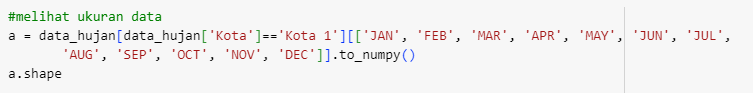

In [ ]:
#melihat ukuran data
#Ketik kodingan disini

(20, 12)

In [ ]:
#menghitung pe dan visualisasi pd
list_pe = []
for k in koordinat['Kota']:
  print(k)
  data_per_kota = data_hujan[data_hujan['Kota']==k][['JAN', 'FEB', 'MAR', 'APR', 'MAY',
                                                     'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
  array_kota = data_per_kota.to_numpy().reshape(1, 20, 12)                      #menyesuaikan ukuran data
  vr = VietorisRipsPersistence(n_jobs=-1, homology_dimensions=[0])      #karena cukup melihat koneksi antar data, jadi dimensinya cukup 0 saja
  pd = vr.fit_transform(array_kota)
  pe = PersistenceEntropy().fit_transform(pd)
  print(pe[0][0])
  list_pe.append(pe[0][0])
  vr.fit_transform_plot(array_kota)

Kota 1
4.094669923215393


Kota 2
4.1879745587497625


Kota 3
4.210527513226857


Kota 4
4.231852040393208


Kota 5
4.211476903119307


Kota 6
4.191146606520663


Kota 7
4.195820058860625


Kota 8
4.212408202812786


Kota 9
4.202310088421939


Kota 10
4.218731313997389


Kota 11
4.205836678323037


Kota 12
4.220709621017553


Kota 13
4.1071420436746


Kota 14
4.2191096677239495


Kota 15
4.174549675881316


Kota 16
4.190151039272623


Kota 17
4.182060541889507


Kota 18
4.052708157994993


Kota 19
4.1798512642868095


Kota 20
4.227225467075283


Kota 21
4.210357567751532


Kota 22
4.191207156656081


Kota 23
4.201212357471698


Kota 24
4.221616680913361


Kota 25
4.181348611024444


Kota 26
4.2220062131219604


Kota 27
4.188566359923302


Kota 28
4.210037262716632


Kota 29
4.191637773598712


Kota 30
4.204909243843724


In [ ]:
list_pe

[4.094669923215393,
 4.1879745587497625,
 4.210527513226857,
 4.231852040393208,
 4.211476903119307,
 4.191146606520663,
 4.195820058860625,
 4.212408202812786,
 4.202310088421939,
 4.218731313997389,
 4.205836678323037,
 4.220709621017553,
 4.1071420436746,
 4.2191096677239495,
 4.174549675881316,
 4.190151039272623,
 4.182060541889507,
 4.052708157994993,
 4.1798512642868095,
 4.227225467075283,
 4.210357567751532,
 4.191207156656081,
 4.201212357471698,
 4.221616680913361,
 4.181348611024444,
 4.2220062131219604,
 4.188566359923302,
 4.210037262716632,
 4.191637773598712,
 4.204909243843724]

## Tambahkan PE dan rata-rata curah hujan pada dataframe koordinat

In [ ]:
annual_mean = []
for k in koordinat['Kota']:
  data_tahunan = data_hujan[data_hujan['Kota']==k]['Annual']
  annual_mean.append(data_tahunan.mean())
annual_mean

Kota 1
Kota 2
Kota 3
Kota 4
Kota 5
Kota 6
Kota 7
Kota 8
Kota 9
Kota 10
Kota 11
Kota 12
Kota 13
Kota 14
Kota 15
Kota 16
Kota 17
Kota 18
Kota 19
Kota 20
Kota 21
Kota 22
Kota 23
Kota 24
Kota 25
Kota 26
Kota 27
Kota 28
Kota 29
Kota 30


[2407.535,
 2792.675,
 1562.7899999999997,
 1377.3449999999998,
 1295.2599999999998,
 1041.03,
 871.6200000000001,
 1421.355,
 553.755,
 632.075,
 1152.81,
 1085.3349999999998,
 297.125,
 681.6949999999999,
 977.3799999999999,
 1202.19,
 920.875,
 517.33,
 2875.2050000000004,
 869.615,
 741.6499999999999,
 1040.8399999999997,
 958.8249999999998,
 757.51,
 942.885,
 3446.59,
 735.65,
 1073.8500000000001,
 2710.9900000000002,
 1555.3650000000002]

Ketik kodingan berikut:  

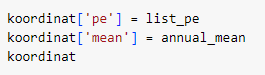

In [ ]:
#ketik disini

,Kota,Latitude,Longitude,pe,mean
0,Kota 1,24.776975,93.092095,4.094670,2407.535
1,Kota 2,26.383897,88.161171,4.187975,2792.675
2,Kota 3,24.586280,87.967976,4.210528,1562.790
3,Kota 4,20.543120,84.689730,4.231852,1377.345
4,Kota 5,23.455980,85.255730,4.211477,1295.260
5,Kota 6,26.618724,82.868991,4.191147,1041.030
6,Kota 7,27.713430,78.298678,4.195820,871.620
7,Kota 8,30.041740,79.089690,4.212408,1421.355
8,Kota 9,29.455685,76.792433,4.202310,553.755
9,Kota 10,30.929320,75.500480,4.218731,632.075


Ketik kodingan sorting berdasarkan nilai "pe"

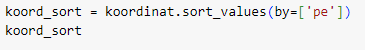

In [ ]:
#melakukan sorting
#ketik disini

,Kota,Latitude,Longitude,pe,mean
17,Kota 18,23.181228,70.568914,4.052708,517.330
0,Kota 1,24.776975,93.092095,4.094670,2407.535
12,Kota 13,26.815276,71.003402,4.107142,297.125
14,Kota 15,22.919494,75.035783,4.174550,977.380
18,Kota 19,15.300450,74.085510,4.179851,2875.205
24,Kota 25,10.909430,78.366530,4.181349,942.885
16,Kota 17,23.059981,72.930975,4.182061,920.875
1,Kota 2,26.383897,88.161171,4.187975,2792.675
26,Kota 27,16.200616,75.422200,4.188566,735.650
15,Kota 16,23.937614,81.111223,4.190151,1202.190


## Membuat mapper dengan 2 filter function

Tujuan mapper dengan 2 filter function adalah untuk membandingkan hasil keduanya. Hyperparameter yang saat ini bisa digunakan adalah 'pe' dan 'mean' sebagai filter function, jumlah intervalnya 6 dengan overlap 30% dan DBSCAN clustering. Silahkan diisi atau digonta-ganti untuk mengetes hasilnya.

In [ ]:
koord_copy = koord_sort.copy()
del koord_copy['Kota']                                         #buat dataframe baru biar kolom kota bisa dihapus
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=['pe', 'mean'])

# Define cover
cover = CubicalCover(n_intervals=..., overlap_frac=...)

# Choose clustering algorithm
#clusterer = KMeans(n_clusters=2)
#alternatif lain bisa menggunakan DBSCAN, dll
#clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs
)

fig = plot_static_mapper_graph(pipe, koord_copy, color_data=koord_copy, color_features=filter_func)
fig.show(config={'scrollZoom': True})

0 artinya filter function pertama, dan 1 yang kedua. Setelah dikelompokkan berdasarkan kedekatan koordinat, nilai pe, dan rata-rata curah hujan, kita bisa melihat bahwa kelompok wilayah dengan pe rendah bukanlah wilayah yang dengan rata-rata curah hujan relatif tinggi dibandingkan wilayah lain. Artinya kita perlu mewaspadai banjir karena bisa jadi serapan air ke tanah di wilayah tersebut tidak sanggup jika curah hujan meningkat drastis.

In [ ]:
id = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
#menginput kelompok wilayah
graph = pipe.fit_transform(koord_copy)
list_kel = [0]*30                        #membuat list sementara yang berisi 0 sebanyak 30 (krn ada 30 kota)
node_elements = graph.vs["node_elements"]
for i in id:                                   #nomor kelompok segment
  for n in node_elements[i]:                   #nomor respondent per segment
    list_kel[n] = i                        #menyimpan nomor kelompok segment sesuai urutan respondent

koord_sort['kelompok'] = list_kel
koord_sort

node 6 memiliki anggota yang secara rata-rata curah hujannya tinggi. Namun, pe-nya relatif sama stabil, jadi meski curah hujannya tinggi tapi masih dalam kadar yang biasa untuk daerah tersebut.

Kota 15 dan 18 memiliki pe rendah, sehingga kemungkinan hujan di daerah ini kurang stabil. Jika dilihat dari rata-rata curah hujannya tidak rendah sehingga kemungkinan tidak terjadi kekeringan. Namun bisa saja hujan turun terlalu besar melebihi biasanya sehingga serapan tanah kurang baik

# Template tugas kelompok
https://bit.ly/tugas-tda
